In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [12]:
class Classifier:
    def __init__(self, test_size, c, gamma):
        data = load_iris().data
        target = load_iris().target
        self.target_name = load_iris().target_names
        self.target_name = np.concatenate((self.target_name, ["wrong_class"]))
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data, target, test_size=test_size)
        self.model = SVC(C=c, gamma=gamma,kernel="poly")

    def fit_predict(self):
        self.model = self.model.fit(self.X_train, self.y_train)
        self.predicted_class = self.model.predict(self.X_test)

    def plot(self):
        self.fit_predict()
        
        colors = ['b', 'c', 'y', 'm']
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        result_target = [x if (x == y)else 3 for x, y in zip(self.predicted_class, self.y_test)]
        plot_data = np.concatenate((self.X_train, self.X_test), axis=0)
        plot_target = np.concatenate((self.y_train, result_target), axis=0)
        labels = self.target_name
        class1 = [i for i, x in enumerate(plot_target) if x == 0]
        class2 = [i for i, x in enumerate(plot_target) if x == 1]
        class3 = [i for i, x in enumerate(plot_target) if x == 2]
        class4 = [i for i, x in enumerate(plot_target) if x == 3]
        ax.scatter(plot_data[class1, 1], plot_data[class1, 2], plot_data[class1, 0], marker='o', label=labels[0],
                   color=colors[0], s=25)
        ax.scatter(plot_data[class2, 1], plot_data[class2, 2], plot_data[class2, 0], marker='o', label=labels[1],
                   color=colors[1], s=25)
        ax.scatter(plot_data[class3, 1], plot_data[class3, 2], plot_data[class3, 0], marker='o', label=labels[2],
                   color=colors[2], s=25)
        ax.scatter(plot_data[class4, 1], plot_data[class4, 2], plot_data[class4, 0], marker='o', label=labels[3],
                   color=colors[3], s=25)
        ax.legend()
        print("Right Classification", len(class1) + len(class2) + len(class3))
        print("Wrong Classification", len(class4))
        plt.show()


Right Classification 72
Wrong Classification 78


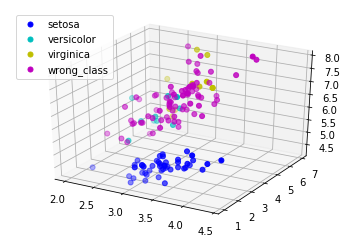

In [13]:
classifier = Classifier(test_size=0.75, c=2**-15, gamma=0.1)
classifier.plot()